<a href="https://colab.research.google.com/github/niteshkumar2000/Forward-Backward-Selection/blob/master/DataScienceAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Stepwise Feature Selection

In [3]:
# Import neccessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


## Preprocessing wine dataset

In [4]:
# Loading dataset
from sklearn.datasets import load_wine
data = load_wine()

In [5]:
# Preparing x and y inputs
x = pd.DataFrame(data.data)
x.columns = data.feature_names
y = pd.DataFrame(data.target)

In [6]:
# Preparing 70% of data for training and 30% of data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Describing the test and train data
print(x.head(), x_train.shape, x_test.shape)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  


## Implementation of FBS algorithm


### Performing Forward Selection

In [7]:
# Creating a random forest classifier modal
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)

# preforming forward selection and testing with random forest modal
forward_data = SFS(rf,
                   k_features = 7,
                   forward= True,
                   floating = False,
                   verbose= 2,
                   scoring= 'accuracy',
                   cv = 4,
                   n_jobs= -1)

# Training the modal with data after forward selection
forwardres = forward_data.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.3s finished

[2020-07-12 16:18:36] Features: 1/7 -- score: 0.7338709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.3s finished

[2020-07-12 16:18:41] Features: 2/7 -- score: 0.9516129032258065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.2s finished

[2020-07-12 16:18:45] Features: 3/7 -- score: 0.967741935483871[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished

[2020-07-12 16:18:49] Features: 4/7 -- score: 0.9838709

### Printing Results of Forward Selection

In [8]:
# Listing the selected features
print(forwardres.k_feature_names_)

# Displaying the accuracy
print(forwardres.k_score_)

('alcohol', 'ash', 'magnesium', 'flavanoids', 'nonflavanoid_phenols', 'color_intensity', 'proline')
0.9919354838709677


> Data for Backward Selection

In [10]:
# Preparing the data for phase 2 (backward elimination)
import copy
backdata = copy.deepcopy(pd.DataFrame(x_train, columns=forwardres.k_feature_names_))

### Performing Backward Elimination on the result of forward selection

In [11]:
# Creating a random forest classifier modal
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)

# Preforming backward elimination with the result of forward selection and testing with random forest modal
backward_data = SFS(rf,
                    k_features = 4,
                    forward= False,
                    floating = False,
                    verbose= 2,
                    scoring= 'accuracy',
                    cv = 4,
                    n_jobs= -1)

# Training the modal with data after backward elimination
backwardres = backward_data.fit(backdata.values, np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    1.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.5s finished

[2020-07-12 16:24:19] Features: 6/4 -- score: 0.9758064516129032[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.6s finished

[2020-07-12 16:24:22] Features: 5/4 -- score: 0.9838709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished

[2020-07-12 16:24:25] Features: 4/4 -- score: 0.9758064516129032

### Printing final result of FBS

In [12]:
print(backwardres.k_feature_names_)
print(backwardres.k_score_)

('0', '2', '3', '5')
0.9758064516129032


> The result are the columns ('2', '3', '4', '5') of backdata when four features are selected

> ('magnesium', 'flavanoids', 'proanthocyanins', 'color_intensity') are the selected feature with score 0.97876

### Implementation of FBED (with early dropping)

In [14]:
# Making copies if training data
data1 = copy.deepcopy(x_train)
data2 = copy.deepcopy(x_train)

# Run the loop for k-value 5
# Change iteration as needed
for i in range(1,6):
    # # Creating a random forest classifier modal
    rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
    
    # preforming forward selection and testing with random forest modal
    fwed_data = SFS(rf,
                    k_features = i,
                    forward= True,
                    floating = False,
                    verbose= 2,
                    scoring= 'accuracy',
                    cv = 4,
                    n_jobs= -1)
    
    # Training the modal with data after forward selection
    forwwithearly = fwed_data.fit(data1, y_train)
    
    # Displaying the set of features included after forward selection
    print(forwwithearly.k_feature_names_)
    
    # Preparing the data for creating correlation matrix
    for j in range(i):
        if forwwithearly.k_feature_names_[j] in data2.columns:
            del data2[forwwithearly.k_feature_names_[j]]
#     print(data2)
#     print(data1)
    
    # Creating a correlation matrix
    columncorr = set() 
    corrmatrix = data2.corr()
    
    # Eliminating the features which does not satisfy the criterion
    for i in range(len(corrmatrix.columns)):
        for j in range(i):
            if (corrmatrix.iloc[i, j] >= 0.70) and (corrmatrix.columns[j] not in columncorr):
                columnname = corrmatrix.columns[i]
                columncorr.add(columnname)
                if columnname in data2.columns:
                    del data2[columnname] 
                    del data1[columnname]
                    print(columnname)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.2s finished

[2020-07-12 16:35:18] Features: 1/1 -- score: 0.7338709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


('flavanoids',)
od280/od315_of_diluted_wines


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s finished

[2020-07-12 16:35:23] Features: 1/2 -- score: 0.7338709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.6s finished

[2020-07-12 16:35:27] Features: 2/2 -- score: 0.9516129032258065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


('flavanoids', 'color_intensity')


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s finished

[2020-07-12 16:35:33] Features: 1/3 -- score: 0.7338709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.9s finished

[2020-07-12 16:35:38] Features: 2/3 -- score: 0.9516129032258065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished

[2020-07-12 16:35:42] Features: 3/3 -- score: 0.967741935483871[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


('magnesium', 'flavanoids', 'color_intensity')


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.3s finished

[2020-07-12 16:35:48] Features: 1/4 -- score: 0.7338709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.9s finished

[2020-07-12 16:35:53] Features: 2/4 -- score: 0.9516129032258065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished

[2020-07-12 16:35:57] Features: 3/4 -- score: 0.967741935483871[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.8s finished

[2020-07-12 16:36:02] Features: 4/4 -- score: 0.9838709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

('alcohol', 'magnesium', 'flavanoids', 'color_intensity')


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s finished

[2020-07-12 16:36:07] Features: 1/5 -- score: 0.7338709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.1s finished

[2020-07-12 16:36:13] Features: 2/5 -- score: 0.9516129032258065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.8s finished

[2020-07-12 16:36:18] Features: 3/5 -- score: 0.967741935483871[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.5s finished

[2020-07-12 16:36:22] Features: 4/5 -- score: 0.9838709677419355[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

('alcohol', 'magnesium', 'flavanoids', 'color_intensity', 'proline')


[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    3.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.7s finished

[2020-07-12 16:36:26] Features: 5/5 -- score: 0.9838709677419355

### Attributes removed after performing early dropping

In [16]:
# printing the column names afer early dropping
print(forwwithearly.k_feature_names_)

# Accuracy after permorming early dropping
print(forwwithearly.k_score_)

('alcohol', 'magnesium', 'flavanoids', 'color_intensity', 'proline')
0.9838709677419355


In [17]:
# Preparing data for backward elimintion after early dropping
selectedforback = copy.deepcopy(pd.DataFrame(x_train, columns=forwwithearly.k_feature_names_))
print(selectedforback)

     alcohol  magnesium  flavanoids  color_intensity  proline
138    13.49       88.0        0.48             5.70    580.0
104    12.51       85.0        1.92             2.94    672.0
78     12.33      136.0        1.85             3.40    750.0
36     13.28      110.0        2.68             4.60    880.0
93     12.29       88.0        2.25             2.15    290.0
..       ...        ...         ...              ...      ...
71     13.86       86.0        2.86             3.38    410.0
106    12.25       80.0        2.03             3.40    510.0
14     14.38      102.0        3.64             7.50   1547.0
92     12.69       80.0        1.46             3.05    495.0
102    12.34       98.0        2.11             2.80    438.0

[124 rows x 5 columns]


### Performing Backward Elimination on result of early dropping

In [18]:
# Creating a random forest classifier modal
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)

# preforming backward elimination on early dropping output and testing with random forest modal
finalres_data = SFS(rf,
                    k_features = 4,
                    forward= False,
                    floating = False,
                    verbose= 2,
                    scoring= 'accuracy',
                    cv = 4,
                    n_jobs= -1)

# Training the modal with data after backward elimination
Finalres = finalres_data.fit(selectedforback.values, np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished

[2020-07-12 16:40:24] Features: 4/4 -- score: 0.9758064516129032

## Results

In [19]:
# Listing out the final list of selected features
print(Finalres.k_feature_idx_)

# Accuracy of the modal
print(Finalres.k_score_)

(0, 1, 2, 3)
0.9758064516129032


> which are ('ash', 'magnesium', 'flavanoids', 'color_intensity')


> Thus forward-Backward selection with early dropping is done by finding the independent variables and eliminating it which decreases the run time significantly by giving almost same accuracy. 
Each iteration performed during forward selection is depicted for any number of features.

> Early dropping is done by finding the **correlation matrix** after performing each iteration of Forward Selection

## Visualization

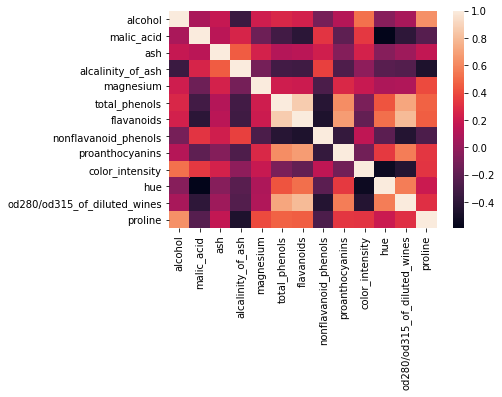

In [21]:
# Preparing data for heatmap
cordata = copy.deepcopy(x_train)

# Visualizing the correlation matrix of the training data
import seaborn as sea
sea.heatmap(cordata.corr())

In [22]:
# Better visualization of traiing data
cordata.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

> Early Dropping helps in decresing the time consumption of the model. Also the method  Exhaustive Feature Selection helps in attaining best scores with best attributes but time consuming

## Exhaustive Feature Selection

In [23]:
# Using exhaustive feature selector to increase accuracy 
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Creating a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Performing exhaustive feature selection 
efs_data = EFS(rf,
               min_features= 4,
               max_features= 5,
               scoring='accuracy',
               cv = None,
               n_jobs=-1)

# Training the modal after performing exhaustive feature selection
exhaustive = efs_data.fit(x_train, y_train)

Features: 2002/2002

## Results of Exhaustive Feature Selection

In [24]:
# Listing out the final list of selected features
print(Finalres.k_feature_idx_)

# Accuracy of the modal
print(Finalres.k_score_)

(0, 1, 2, 3)
0.9758064516129032


> But this method consumes more time among all but gives us a better accuracy